## Analysis of feature selection results; single-cancer holdouts

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import upsetplot as up
from venn import generate_petal_labels

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

%load_ext autoreload
%autoreload 2

In [2]:
# analysis of results generated by script:
# 01_stratified_classification/run_stratified_classification.py
# (with varying feature_selection parameters)

single_cancer_dir = os.path.join('results', 'univariate_fs', 'single_cancer')
pancancer_dir = os.path.join('results', 'univariate_fs', 'pancancer')
pancancer_only_dir = os.path.join('results', 'univariate_fs', 'pancancer_only')
large_n_dims = 1000
small_n_dims = 250

### Load results

There are 3 general experiments to load the results of here: TODO explain

In [3]:
single_cancer_df = au.load_prediction_results_fs(
    single_cancer_dir, cfg.fs_methods
)
single_cancer_df['train_set'] = 'single_cancer'

single_cancer_df.loc[
    (single_cancer_df.fs_method == 'mad') & (single_cancer_df.n_dims == small_n_dims),
    'fs_method'
] = 'mad_{}'.format(small_n_dims)
single_cancer_df.loc[
    (single_cancer_df.fs_method == 'mad') & (single_cancer_df.n_dims == large_n_dims),
    'fs_method'
] = 'mad_{}'.format(large_n_dims)

print(np.unique(single_cancer_df.seed))
print(single_cancer_df.shape)
single_cancer_df.head()

[ 1 42]
(5904, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,0.82797,0.88066,TP53,PAAD,signal,42,train,0,mad_250,250,single_cancer
1,0.64167,0.87810,TP53,PAAD,signal,42,test,0,mad_250,250,single_cancer
2,0.72233,0.80906,TP53,PAAD,signal,42,cv,0,mad_250,250,single_cancer
3,0.85531,0.92739,TP53,PAAD,signal,42,train,1,mad_250,250,single_cancer
4,0.66957,0.76241,TP53,PAAD,signal,42,test,1,mad_250,250,single_cancer


In [4]:
pancancer_df = au.load_prediction_results_fs(
    pancancer_dir, cfg.fs_methods
)
pancancer_df['train_set'] = 'pancancer'

pancancer_df.loc[
    (pancancer_df.fs_method == 'mad') & (pancancer_df.n_dims == small_n_dims),
    'fs_method'
] = 'mad_{}'.format(small_n_dims)
pancancer_df.loc[
    (pancancer_df.fs_method == 'mad') & (pancancer_df.n_dims == large_n_dims),
    'fs_method'
] = 'mad_{}'.format(large_n_dims)

print(np.unique(pancancer_df.seed))
print(pancancer_df.shape)
pancancer_df.head()

[ 1 42]
(5904, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,0.90235,0.88124,TP53,PAAD,signal,42,train,0,mad_250,250,pancancer
1,0.95000,0.98709,TP53,PAAD,signal,42,test,0,mad_250,250,pancancer
2,0.85635,0.82836,TP53,PAAD,signal,42,cv,0,mad_250,250,pancancer
3,0.90357,0.88546,TP53,PAAD,signal,42,train,1,mad_250,250,pancancer
4,0.58551,0.73804,TP53,PAAD,signal,42,test,1,mad_250,250,pancancer


In [5]:
pancancer_only_df = au.load_prediction_results_fs(
    pancancer_only_dir, cfg.fs_methods
)
pancancer_only_df['train_set'] = 'pancancer_only'

pancancer_only_df.loc[
    (pancancer_only_df.fs_method == 'mad') & (pancancer_only_df.n_dims == small_n_dims),
    'fs_method'
] = 'mad_{}'.format(small_n_dims)
pancancer_only_df.loc[
    (pancancer_only_df.fs_method == 'mad') & (pancancer_only_df.n_dims == large_n_dims),
    'fs_method'
] = 'mad_{}'.format(large_n_dims)

print(np.unique(pancancer_only_df.seed))
print(pancancer_only_df.shape)
pancancer_only_df.head()

[ 1 42]
(5808, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,0.90111,0.87966,TP53,PAAD,signal,42,train,0,mad_250,250,pancancer_only
1,0.94167,0.98511,TP53,PAAD,signal,42,test,0,mad_250,250,pancancer_only
2,0.85117,0.82621,TP53,PAAD,signal,42,cv,0,mad_250,250,pancancer_only
3,0.90111,0.87966,TP53,PAAD,signal,42,train,1,mad_250,250,pancancer_only
4,0.59710,0.72623,TP53,PAAD,signal,42,test,1,mad_250,250,pancancer_only


In [6]:
def compare_from_experiment(experiment_df):
    compare_df = []
    for fs_method in experiment_df.fs_method.unique():
        for holdout_cancer_type in experiment_df.holdout_cancer_type.unique():
            compare_df.append(
                au.compare_control_ind(
                    experiment_df[
                        (experiment_df.fs_method == fs_method) &
                        (experiment_df.holdout_cancer_type == holdout_cancer_type)
                    ], metric='aupr', verbose=True)
                  .assign(fs_method=fs_method,
                          holdout_cancer_type=holdout_cancer_type)
            )
    return pd.concat(compare_df)
    
single_cancer_compare_df = compare_from_experiment(single_cancer_df)
pancancer_compare_df = compare_from_experiment(pancancer_df)
pancancer_only_compare_df = compare_from_experiment(pancancer_only_df)

print(single_cancer_compare_df.shape,
      pancancer_compare_df.shape,
      pancancer_only_compare_df.shape)

(984, 6) (984, 6) (968, 6)


In [7]:
single_cancer_compare_df.head()

,identifier,seed,fold,delta_aupr,fs_method,holdout_cancer_type
0,TP53,42,0,0.03254,mad_250,PAAD
1,TP53,42,1,0.20629,mad_250,PAAD
2,TP53,42,2,0.18808,mad_250,PAAD
3,TP53,42,3,0.22626,mad_250,PAAD
4,TP53,1,0,0.05957,mad_250,PAAD


### Plot average performance across cancer types

In [8]:
gene = 'TP53'

# start with a few cancer types with reasonable label balance/test set sizes
cancer_types = [
    'BLCA',
    'BRCA',
    'COAD',
    'LGG',
    'LUAD',
    'SARC',
    'STAD',
    'UCEC'
]

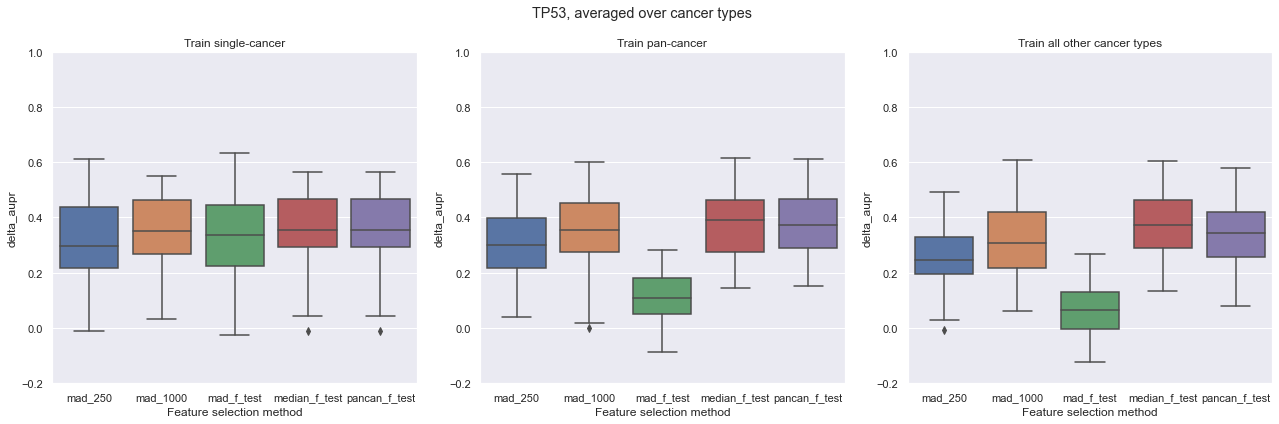

In [9]:
sns.set({'figure.figsize': (18, 6)})
sns.set_context('notebook')

fig, axarr = plt.subplots(1, 3)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]


for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    # averaged over cancer types
    plot_df = compare_df[(compare_df.identifier == gene) &
                         (compare_df.holdout_cancer_type.isin(cancer_types))]
    sns.boxplot(data=plot_df, x='fs_method', y='delta_aupr', ax=ax)
    ax.set_title(names_to_plot[ix])
    ax.set_xlabel('Feature selection method')
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{}, averaged over cancer types'.format(gene))
plt.tight_layout()

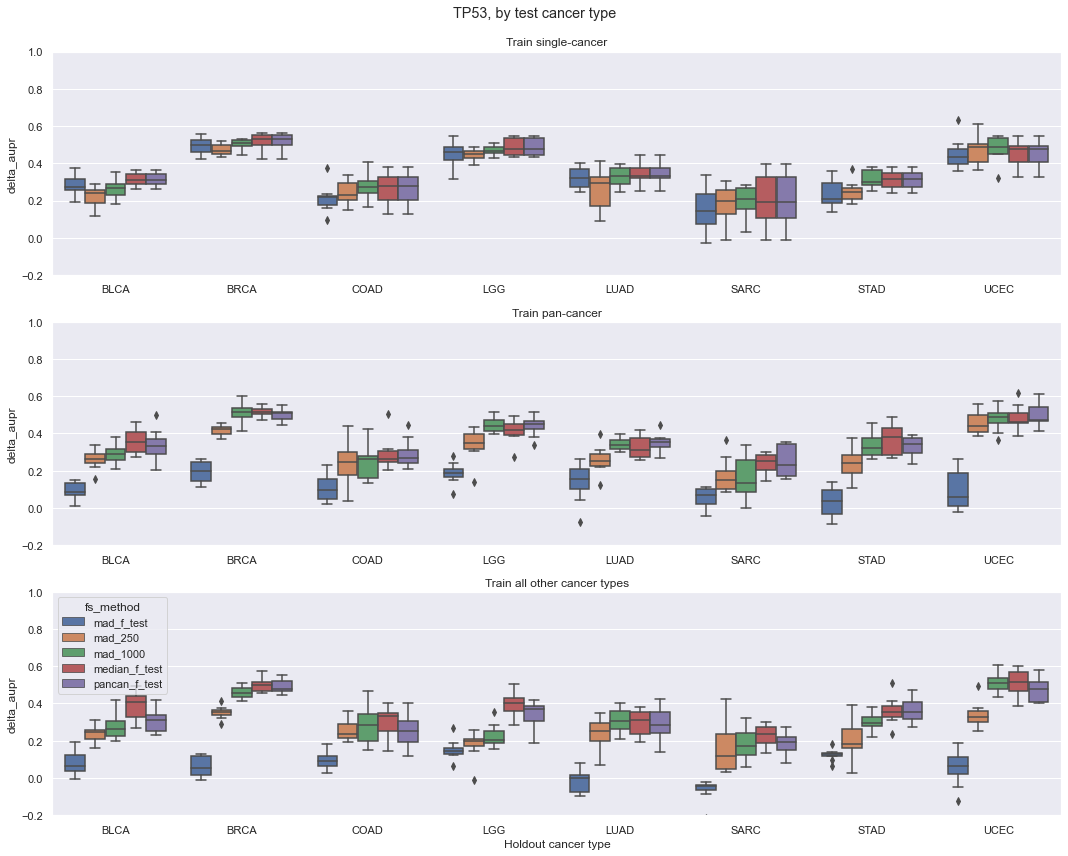

In [10]:
sns.set({'figure.figsize': (15, 12)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 1)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

# split individual cancer types
for ix, to_plot_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    plot_df = (
        to_plot_df[(to_plot_df.identifier == gene) &
                   (to_plot_df.holdout_cancer_type.isin(cancer_types))]
          .sort_values(by='holdout_cancer_type')
    )
    sns.boxplot(data=plot_df, x='holdout_cancer_type', 
                y='delta_aupr', hue='fs_method', ax=ax)
    ax.set_title(names_to_plot[ix])
    if ix == len(dfs_to_plot) - 1:
        ax.set_xlabel('Holdout cancer type')
    else:
        ax.set_xlabel('')
        ax.get_legend().remove()
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{}, by test cancer type'.format(gene), y=0.99)
plt.tight_layout()